#### Explore: class, age, sex
# but how to define?
# bin children, adults, old
# see: women traveling alone, men traveling alone; children, seniors traveling alone
# interplay between class and fare? Departure and fare? How to define wealth 

# Titanic Dataset

We will examine the Titanic dataset provided by Udacity, and described on the Kaggle website. Our main question in looking at the data will be: what factors were most closely associated with surviving the shipwreck? To begin, we will import the dataset, and see what the data looks like.

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('titanic-data.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We see that there are 12 variables associated with each individual. **PassengerId** looks like an artifact of the dataset, indicating the row number; **Name**, **Ticket**, **Fare**, **Cabin**, and **Embarked** look like they might not have much value in analyzing survival rates. The main variables of interest will be **Age**, **Pclass** (Passenger Class), and **Sex**. These are easily interpreted, look fairly consistent, and are ready for processing. We can use them as independent variables, and Survived as the dependent variable. We can ask: were men or women more likely to survive? Were passengers in 1st, 2nd, or 3rd class more likely to survive? Did a passenger's age influence their chances of survival?

**SibSp** and **Parch** are interesting variables, but they pose some challenges. According to the Kaggle website, SibSp indicates the number of siblings or spouses the passenger was travelling with; Parch, the number of parents or children. The meaning of these variables may perhaps be inferred from other variables. For instance, if a passenger has a value of 2 for Parch, and an Age of 10, we might assume that this indicates a 10 year-old child travelling with parents. If the Age value is 25, however, it becomes less clear. The same holds for SibSp: does a value of 1 indicate someone travelling with a spouse? Or a sibling? Perhaps we can analyze these variables in combination with the Name column, and try to infer the relationship from there; matching on surname, guessing gender and status from their title ("Mr.","Mrs."...), etc. This seems beyond the scope of our initial analysis. However, we can assume that any value greater than 0 for either of these variables indicates that the passenger is not travelling alone. That sounds like another interesting variable to examine for correlation with survival, and one which is more easily approached.

Some reevaluations are in order. The variables we ignore initially -- Embarked, Fare, and Name, especially -- may prove to have value later. And, describing any of these variables as "independent" is a great leap. Is Sex really independent from Age and Pclass? In 1912, the year of the sinking, it seems unlikely that many women would be travelling alone. Chances are they would be travelling with a spouse or parents or siblings. This would have implications for the age range of females; and affording multiple tickets aboard the Titanic should also have implications for class and wealth. All these variables are probably bound up with one another in some way, which is going to confuse and skew simple analysis.

Additionally, we spoke too soon about the readiness of the data for processing. Looking at the counts for the variables, we see a total of 891 individuals, but we only have 714 Age values. We'll need to correct for this (and remember to account for this correction) before proceeding.

In [3]:
# https://pandas.pydata.org/pandas-docs/stable/missing_data.html

data['Age'] = data['Age'].fillna(method='pad')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Looking at the sample data, we see that the `pad()` method has functioned as expected, propogating existing values forward into missing values. The Age value for the individual with Name "Moran, Mr. James", formerly NaN, is now 35, copied from the value of the individual above. We call the `describe()` method again to check the outcome. Age now has 891 values, same as the other variables. We see also that the mean and standard deviation have not been dramatically effected, so we can be reasonably confident that the value padding hasn't significantly altered the data.

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


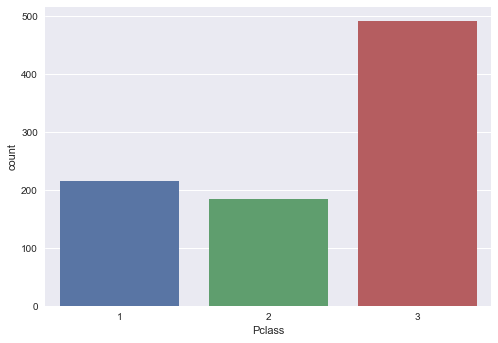

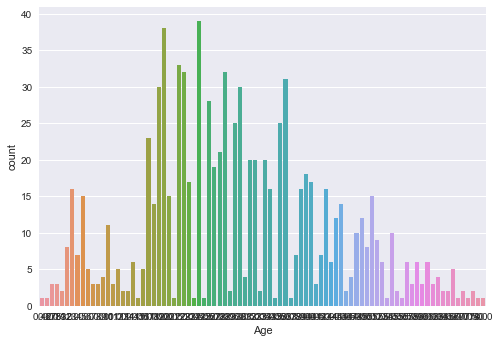

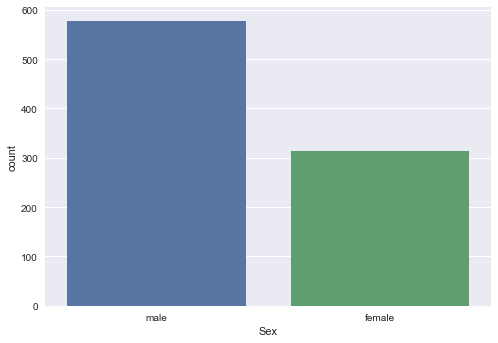

In [5]:
sns.countplot(x=data['Pclass'])
plt.show()
sns.countplot(x=data['Age'])
plt.show()
sns.countplot(x=data['Sex'])
plt.show()

The data is cleaned up, and we can make some immediate observations. First and 2nd class had about the same amount of passengers, and 3rd class had more than 1st and 2nd class combined. About 2/3 of the pasenegers were male and 1/3 female. We see a definite pattern in the distribution in age ranges: concentrated around the middle, with a slight right skew. But, the range of ages makes the graph difficult to interpret. Now seems a good time to manipulate the data, and add some derived columns that may make our opening analysis a little easier.

The **Age** variable is a good candidate for binning, grouping the data into ranges. Binning the data will help us make more general observations about survival outcomes. We start with age ranges by decade, but we can alter the size of these groups later if needs be. For instance, it may make more sense to broaden the ranges into 3 groups: `Youth (0-20)`, `Middle Age (20-50)`, `Older Age (50+)`.

We can also add columns related to the **SibSp** and **Parch** variables. While the meaning of the variables are open to interpretation, we can make some confident inferences which could be useful to analysis. Anyone with a value greater than 1 for Parch or SibSp is travelling as a member of a family, whether that be as a parent or a child, or a sibling or a spouse. And, anyone with a value of 0 for both SibSp and Parch is travelling alone, or at least without any relatives. These are complements of one another, and can be represented by a single boolean variable, **Family**.

We take a quick look at the data using `describe()` to make sure everything is behaving correctly, and then produce more bar charts to examine the data distribution.

In [11]:
#https://chrisalbon.com/python/pandas_binning_data.html

age_bins = [0,10,20,30,40,50,100]
data['BinnedAge'] = pd.cut(data['Age'], age_bins)

data['Family'] = ( data['Parch'] > 0 ) | ( data['SibSp'] > 0 )

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinnedAge,Family,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]",True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]",True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]",False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]",True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]",False,True
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,NaN,Q,"(30, 40]",False,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50, 100]",False,True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0, 10]",True,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(20, 30]",True,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(10, 20]",True,False


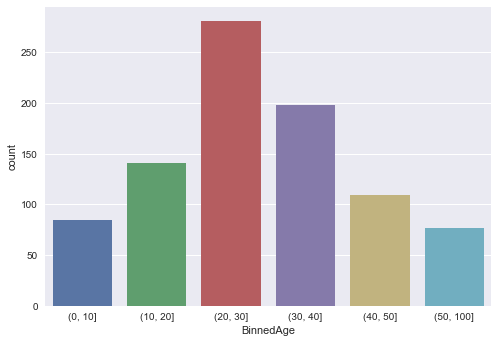

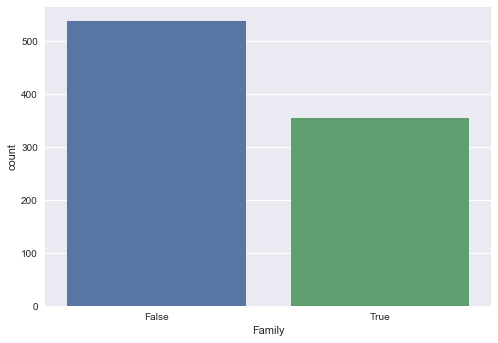

In [12]:
sns.countplot(x=data['BinnedAge'])
plt.show()
sns.countplot(x=data['Family'])
plt.show()

Binning the **Age** variable has produced the desired effect. Graphing the **BinnedAge** variable shows more clear results, with most passenegers between the ages of 20-30 and 30-40. It's worth noting here that this has slightly altered the shape of the original distribution of ages. The distribution for the **Family** variable shows that most passenegers were travelling without reliatives, but a good number were also travelling with family.

Now we are ready to analyze these variables with respect to our primary variable of interest, **Survived**. We recreate the previous graphs, but now divide the indidviduals into two groups, those who survived, and those who did not.

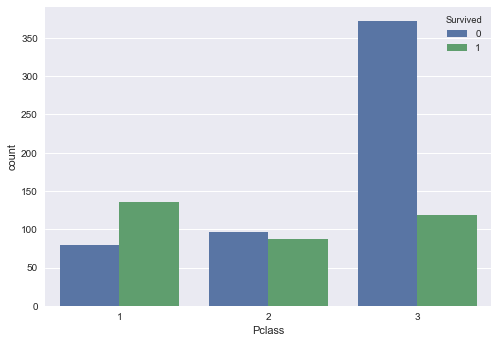

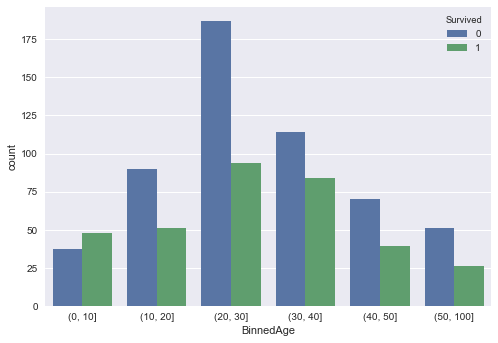

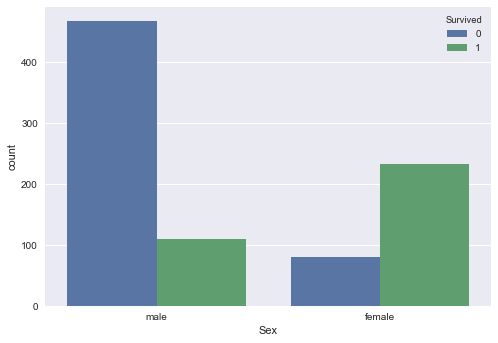

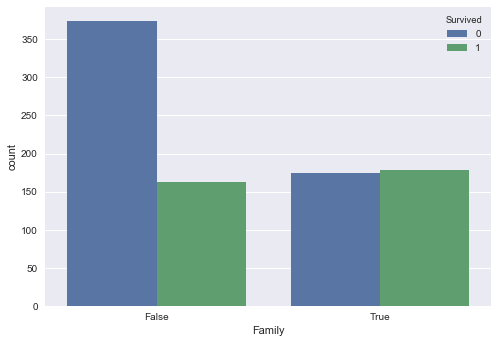

In [14]:
sns.countplot(x=data['Pclass'], hue=data['Survived'])
plt.show()
sns.countplot(x=data['BinnedAge'], hue=data['Survived'])
plt.show()
sns.countplot(x=data['Sex'], hue=data['Survived'])
plt.show()
sns.countplot(x=data['Family'], hue=data['Survived'])
plt.show()

Some points immediately jump out at us. Survival rates were clearly worse for all the following groups:

* 3rd class passengers
* those between the ages of 20-30
* male passengers
* people travelling alone

Some other interesting notes:

* females, 1st class passenegers, those between the ages of 0-10, and those travelling with families all had positive survival rates
* all ages besides 0-10 had a negative survival rate
* the strongest positive survival rates were for females, and those travelling in 1st class

We are left with some lingereing questions however; namely, the one mentioned at the opening of this report: are these variables really independent? If not, then drawing any conclusions from these distributions may be in haste. Perhaps the starkest contrast we see is the survival rates between males and females: males strongly negative, females stringly positive. Instead of survival, let's analyze the variables **Pclass**, **BinnedAge**, and **Family** in terms of the variable **Sex**.

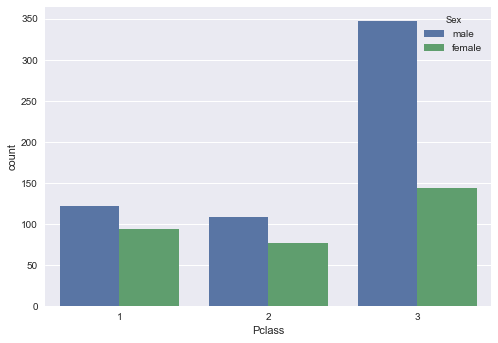

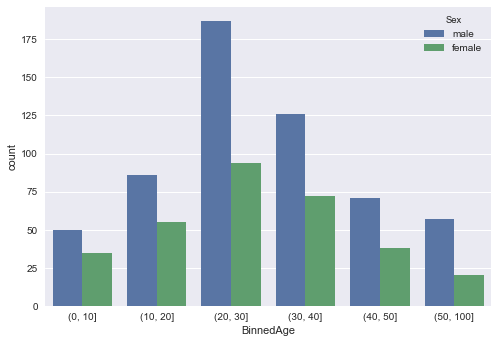

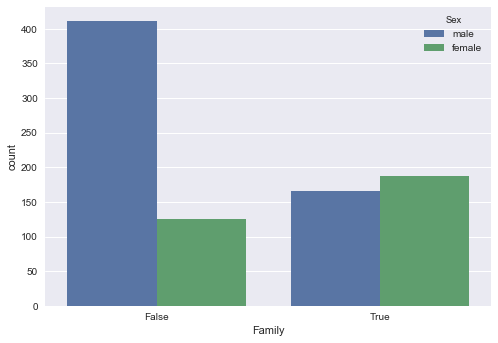

In [16]:
sns.countplot(x=data['Pclass'], hue=data['Sex'])
plt.show()
sns.countplot(x=data['BinnedAge'], hue=data['Sex'])
plt.show()
sns.countplot(x=data['Family'], hue=data['Sex'])
plt.show()

We see confirmed here an assumption we made previously: that most females abord the Titanic wouldn't be travelling alone. Interestingly, a large number were travelling alone; nevertheless we see the majority of females were accompanied by some sort of relative; be it a sibling, spouse, parent, or child. And we see the reverse for males: most men were travelling alone.

Looking at the other graphs, though the distributions are simliar between males and females, we see some notable spikes in the male population. Males are overrepresented in 3rd class, and in the 20-30 year old range. We recall that all these groups -- males, those between the ages of 20-30, those travelling alone, and those in 3rd class -- experienced higher mortality rates. 

So, which factor, if any, is the determining factor? Were 3rd class passengers more likely to die than 1st class passengers? Or were males more likely to die, and it just so happens that males were concentrated in 3rd class? Did travelling with family help females' chances of survival; or is just that females, more likely to survive, were often travelling with family? Answering these questions would be a good goal for the next round of analysis and exploration.

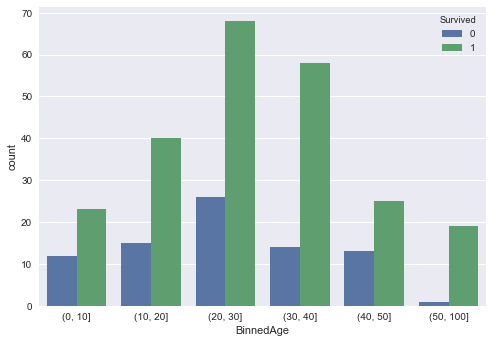

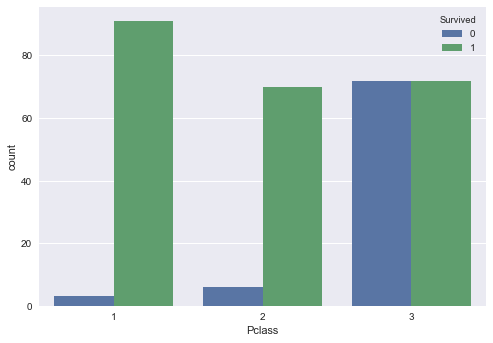

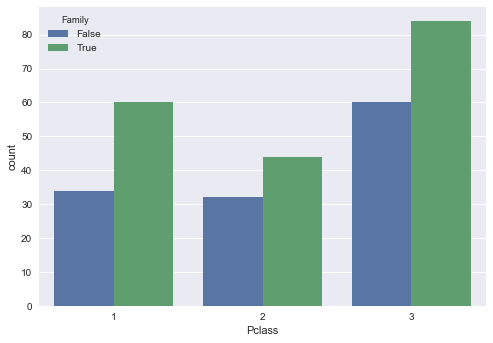

In [15]:
female = data[ data['Sex'] == 'female' ]

sns.countplot(x=female['BinnedAge'])
plt.show()
sns.countplot(x=female['Pclass'], hue=female['Survived'])
plt.show()
sns.countplot(x=female['Pclass'], hue=female['Family'])
plt.show()

In [ ]:
sns.countplot(x=female['BinnedAge'], hue=female['Survived'])
plt.show()
sns.countplot(x=female['Pclass'], hue=female['Survived'])
plt.show()
sns.countplot(x=female['Pclass'], hue=female['Family'])
plt.show()

In [ ]:
male = data[ data['Sex'] == 'male' ]

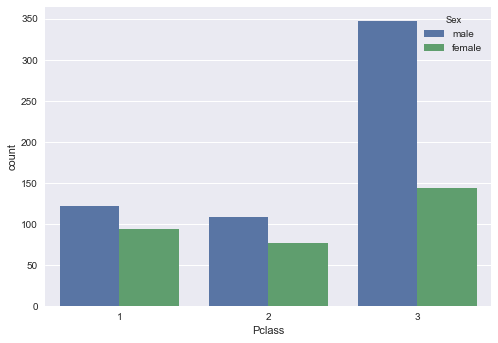

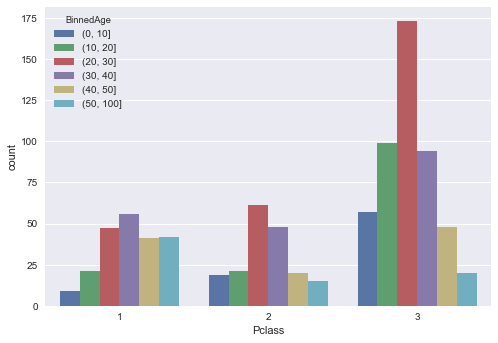

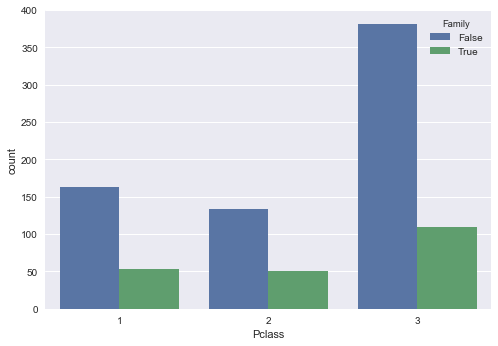

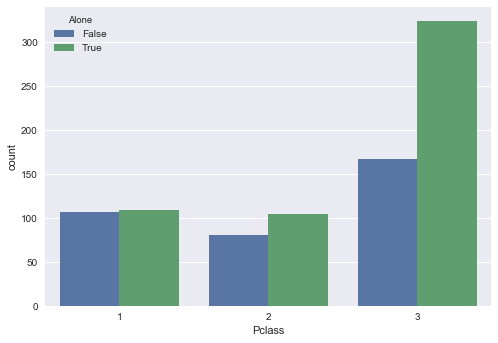

In [27]:
sns.countplot(x=data['Pclass'], hue=data['Sex'])
plt.show()
sns.countplot(x=data['Pclass'], hue=data['BinnedAge'])
plt.show()
sns.countplot(x=data['Pclass'], hue=data['Family'])
plt.show()
sns.countplot(x=data['Pclass'], hue=data['Alone'])
plt.show()

The graph shows a normal distribution across the different age bins. Filtered by sex, the data is still normally distributed, with men outnumbering women. Ages are normally distributed in 3rd class, with a high peak at the center, ages 20-30. Second class sees more spread, suggesting more randomness in the ages. First class has a left skew, meaning older populations are better represented, which follows intuition.

Survivorship seems to follow the age distribution, implying that they might not be correlated. The notable exception is the youngest ages, 0-10, the only age where more survived than died.

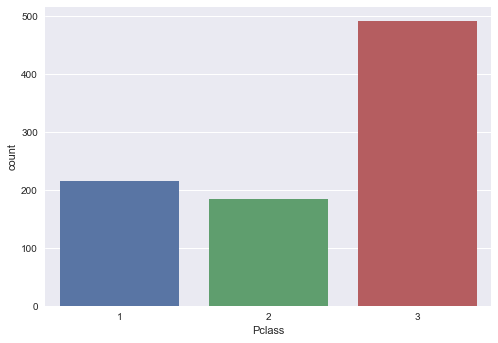

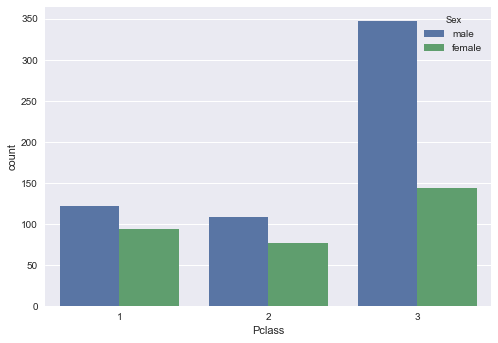

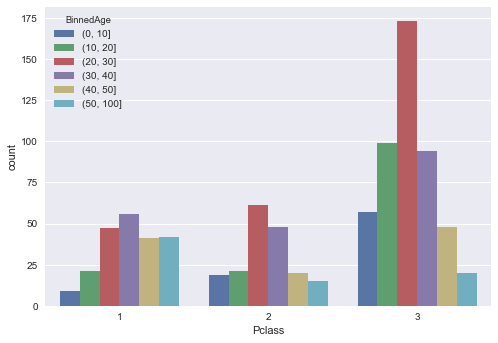

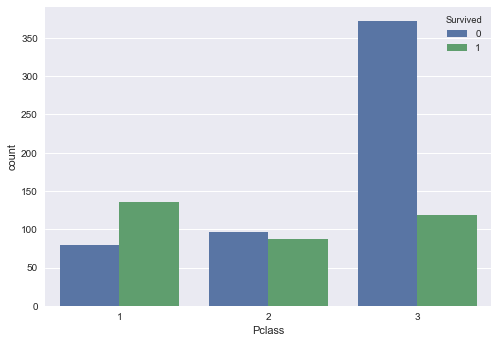

In [7]:
sns.countplot(data['Pclass'])
plt.show()
sns.countplot(x=data['Pclass'], hue=data['Sex'])
plt.show()
sns.countplot(x=data['Pclass'], hue=data['BinnedAge'])
plt.show()
sns.countplot(x=data['Pclass'], hue=data['Survived'])
plt.show()

From the basic visulaization, we see that most of the passengers were in 3rd class. Interestingly, there were more 1st class passengers than 2nd. The naive expectation would be for a linear increase from 1st to 3rd classes. This is probably a peculiarity of the Titanic's ticketing, and may mean that a distinction between 1st and 2nd classes isn't meaningful. More background would be useful here.

We see the same distribution when accounting for sex, but with males overrepresented in 3rd class. Females are approaching a more uniform distribution. Looking at ages, we see a clearer view of the left skew of first class. While 3rd class approximates a normal distribution, we note as well that younger people (30 or less) are more concentrated here.

First class passenegers were more likely to survive, and 3rd class passengers more than twice as likely to die. This is an interesting observation after looking at the age graphs. There, we saw older people were more likely to die. But here we see that 1st class passengers, with a higher concentration of older people, were more likely to survive. This implies a complex interaction, or some lurking variables. 

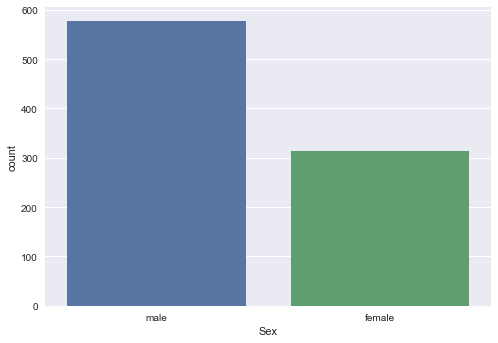

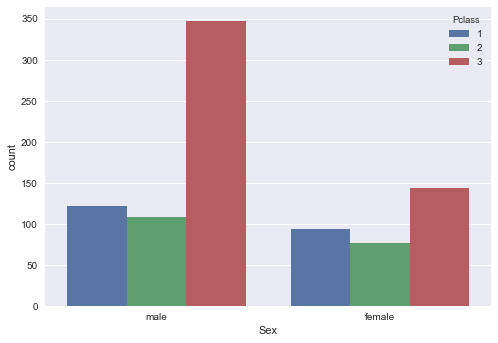

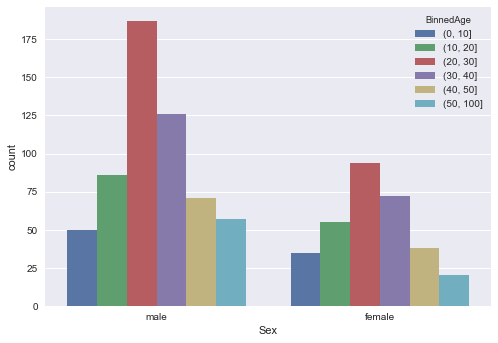

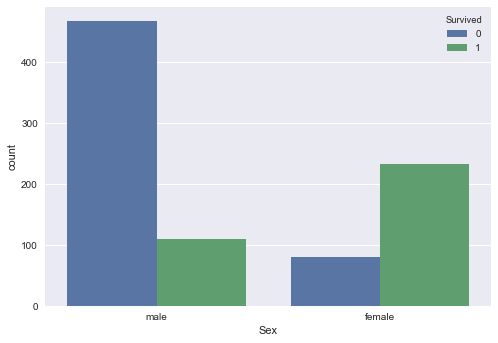

In [8]:
sns.countplot(data['Sex'])
plt.show()
sns.countplot(x=data['Sex'], hue=data['Pclass'])
plt.show()
sns.countplot(x=data['Sex'], hue=data['BinnedAge'])
plt.show()
sns.countplot(x=data['Sex'], hue=data['Survived'])
plt.show()

At this point, we've seen this data before, only along different axes. We note that there are almost twice as many males as females on board, and that the age distribution of the sexes is approximately the same, minus a spike in males ages 20-30. The main takeaway is the difference in survivorship: females were more than twice as likely to survive, and men more than 4 times as likely to die.

This stark difference encourages us to take a closer look at the sexes individually.

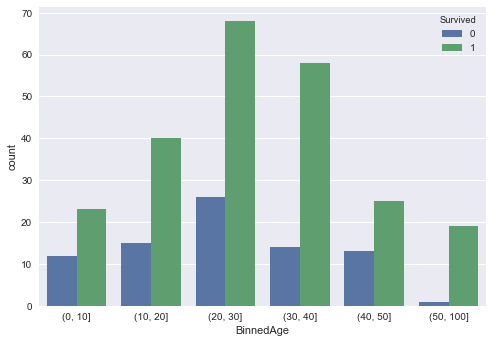

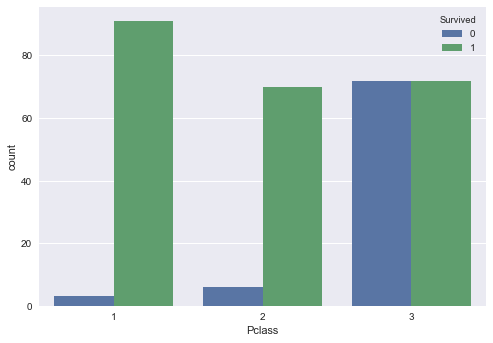

In [9]:
female = data[ data['Sex'] == 'female' ]
sns.countplot(x=female['BinnedAge'], hue=female['Survived'])
plt.show()
sns.countplot(x=female['Pclass'], hue=female['Survived'])
plt.show()

By age, rate of female survival follows their population distribution. Rate of death is approaching a uniform distribution, suggesting randomness. The clear distinction here is between classes: females in 1st and 2nd class were highky likely to survive, whereas females in 3rd class stood a 50/50 chance.

For completeness, we turn to the males.

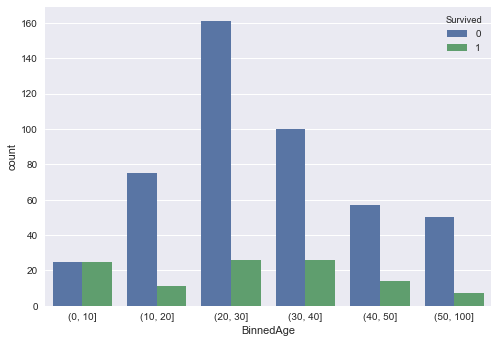

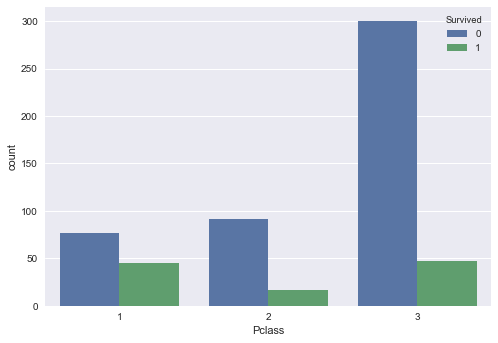

In [10]:
male = data[ data['Sex'] == 'male' ]
sns.countplot(x=male['BinnedAge'], hue=male['Survived'])
plt.show()
sns.countplot(x=male['Pclass'], hue=male['Survived'])
plt.show()

Looking at the age distribution, we see the reverse of the female age distribution: rates of death following the population distribution, and rates of survival approaching a uniform distribution. Notable here is the age bracket 0-10,the only age at which men were not more likely to die than to live.

The class distribution shows more of the same: men were more likely to die. This intriguing however because it is true across all classes. Earlier, looking only at the relationship between class and survival, it appeared that being in 1st and 2nd class meant one was more likely to survive. It is clear now that those results were also effected by sex: females in 1st and 2nd class were almost certain to survive, but not so for males. While males in the upper classes were more likely to survive than their counterparts in 3rd class, males in all classes were still more likely to die than to survive. This challenges an initial assumption, that class would be the determining factor in survival.

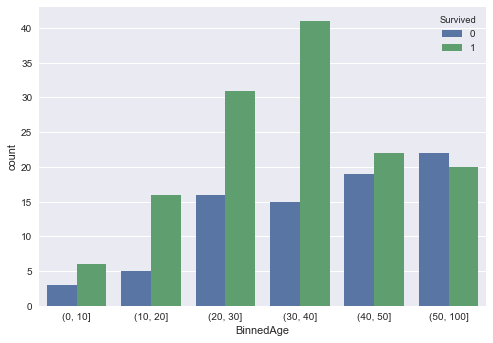

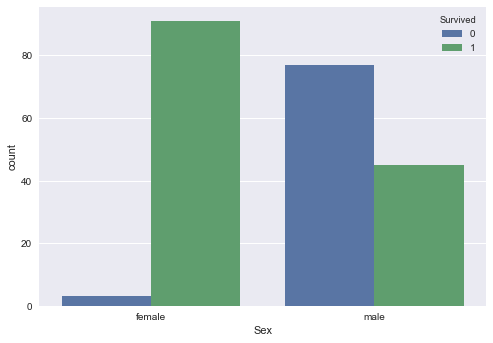

In [11]:
first_class = data[ data['Pclass'] == 1 ]
sns.countplot(x=first_class['BinnedAge'], hue=first_class['Survived'])
plt.show()
sns.countplot(x=first_class['Sex'], hue=first_class['Survived'])
plt.show()

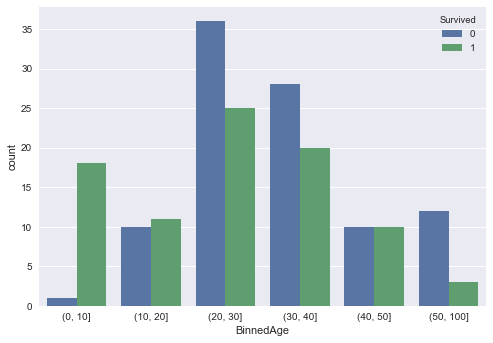

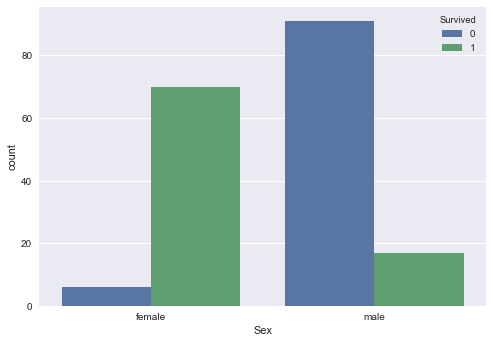

In [12]:
second_class = data[ data['Pclass'] == 2 ]
sns.countplot(x=second_class['BinnedAge'], hue=second_class['Survived'])
plt.show()
sns.countplot(x=second_class['Sex'], hue=second_class['Survived'])
plt.show()

Breaking out the data by 1st and 2nd class reveals little new information regarding the sexes: females are much more likely to survive than males. The age distributions show some interesting inconsistencies, however. Earlier, we saw that 1st and 2nd classes passenegers

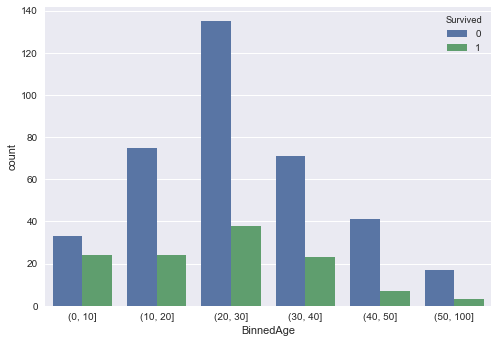

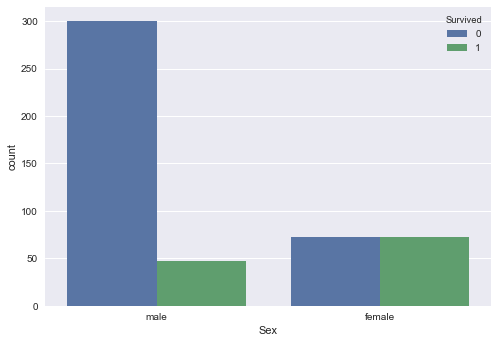

In [13]:
third_class = data[ data['Pclass'] == 3 ]
sns.countplot(x=third_class['BinnedAge'], hue=third_class['Survived'])
plt.show()
sns.countplot(x=third_class['Sex'], hue=third_class['Survived'])
plt.show()

Focusing on distributions for 3rd class hints at a possible problem with our data. The distribution for survivorship by age looks a lot like the distribution for survivorship for males, which we looked at earlier. We recall that the 3rd class population was also largely male, and that 3rd class had the largest population of the 3 classes. The oversized male population in 3rd class may be masking some of our other observations. Simple counts may not be sufficient for understanding this data; we may need to normalize the data somehow.

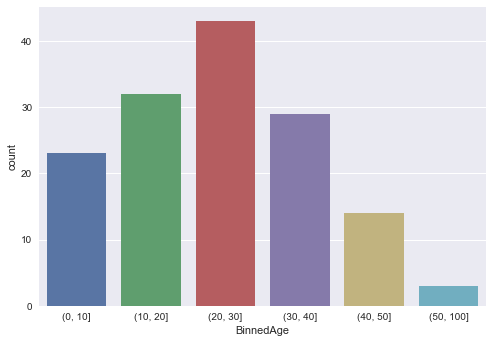

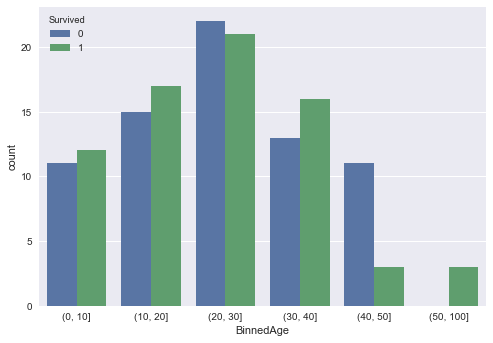

In [14]:
third_class_females = data[ (data['Pclass'] == 3) & (data['Sex'] == 'female') ]
sns.countplot(x=third_class_females['BinnedAge'])
plt.show()
sns.countplot(x=third_class_females['BinnedAge'], hue=third_class_females['Survived'])
plt.show()

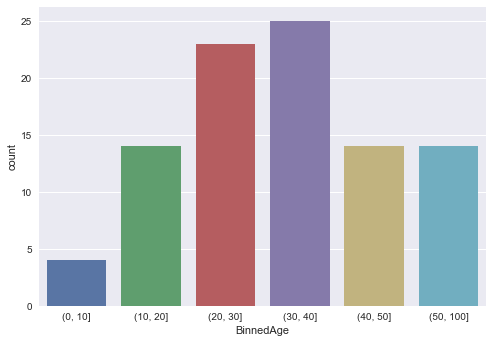

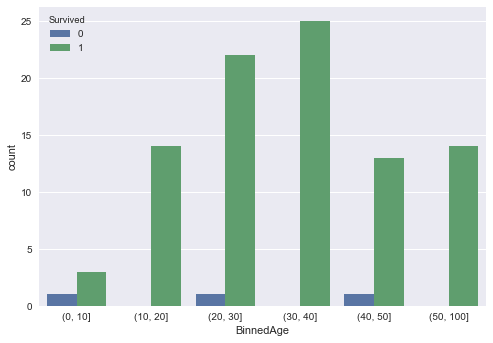

In [15]:
first_class_females = data[ (data['Pclass'] == 1) & (data['Sex'] == 'female') ]
sns.countplot(x=first_class_females['BinnedAge'])
plt.show()
sns.countplot(x=first_class_females['BinnedAge'], hue=first_class_females['Survived'])
plt.show()

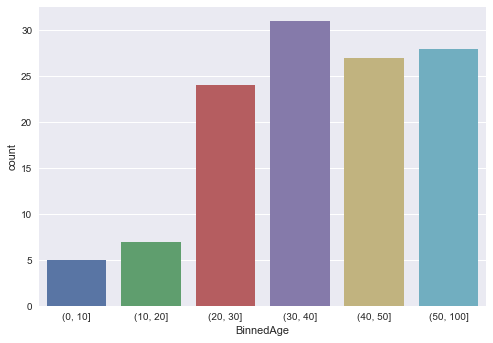

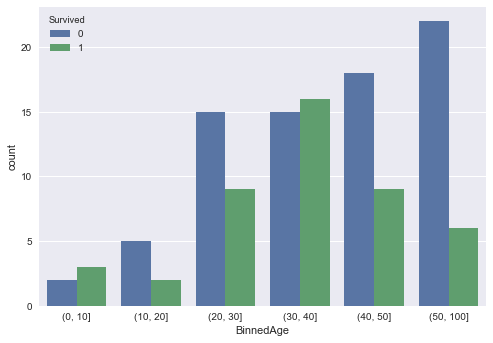

In [16]:
first_class_males = data[ (data['Pclass'] == 1) & (data['Sex'] == 'male') ]
sns.countplot(x=first_class_males['BinnedAge'])
plt.show()
sns.countplot(x=first_class_males['BinnedAge'], hue=first_class_males['Survived'])
plt.show()

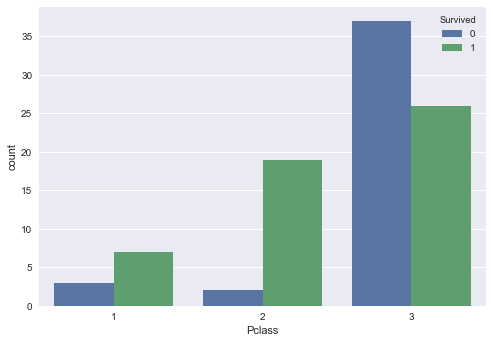

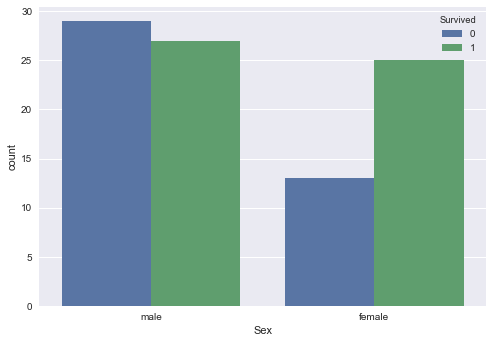

In [17]:
ten_year_olds = data[ data['Age'] <= 13 ]
sns.countplot(x=ten_year_olds['Pclass'], hue=ten_year_olds['Survived'])
plt.show()
sns.countplot(x=ten_year_olds['Sex'],  hue=ten_year_olds['Survived'])
plt.show()

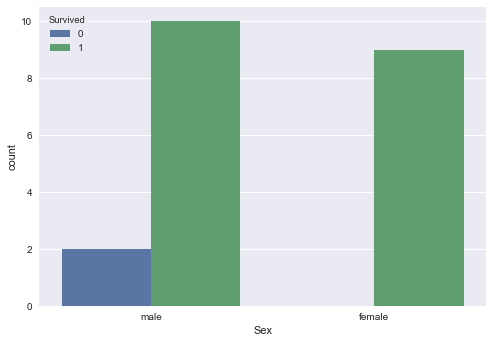

In [18]:
ten_year_olds_2nd_class = data[ (data['Age'] <= 13) & (data['Pclass'] == 2)  ]
sns.countplot(x=ten_year_olds_2nd_class['Sex'], hue=ten_year_olds_2nd_class['Survived'])
plt.show()

In [19]:
ten_year_olds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,440.691489,0.553191,2.563830,4.879468,1.414894,1.063830,30.340468
std,277.266807,0.499828,0.680899,3.593612,1.602482,0.773326,26.909519
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,184.250000,0.000000,2.000000,2.000000,0.000000,0.000000,15.309350
50%,446.500000,1.000000,3.000000,4.000000,1.000000,1.000000,26.000000
75%,729.250000,1.000000,3.000000,8.000000,3.000000,2.000000,32.596875
max,870.000000,1.000000,3.000000,13.000000,5.000000,2.000000,151.550000


In [20]:
ten_year_olds_2nd_class.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000
mean,445.285714,0.904762,2.0,4.491905,0.666667,1.142857,24.813495
std,275.365420,0.300793,0.0,3.606281,0.658281,0.654654,11.529560
min,18.000000,0.000000,2.0,0.670000,0.000000,0.000000,0.000000
25%,194.000000,1.000000,2.0,2.000000,0.000000,1.000000,18.750000
50%,482.000000,1.000000,2.0,3.000000,1.000000,1.000000,26.000000
75%,721.000000,1.000000,2.0,7.000000,1.000000,2.000000,33.000000
max,832.000000,1.000000,2.0,13.000000,2.000000,2.000000,41.579200


In [21]:
data.groupby(['Pclass','BinnedAge']).size().groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

Pclass  BinnedAge
1       (0, 10]       4.166667
        (10, 20]      9.722222
        (20, 30]     21.759259
        (30, 40]     25.925926
        (40, 50]     18.981481
        (50, 100]    19.444444
2       (0, 10]      10.326087
        (10, 20]     11.413043
        (20, 30]     33.152174
        (30, 40]     26.086957
        (40, 50]     10.869565
        (50, 100]     8.152174
3       (0, 10]      11.608961
        (10, 20]     20.162933
        (20, 30]     35.234216
        (30, 40]     19.144603
        (40, 50]      9.775967
        (50, 100]     4.073320
dtype: float64